In [1]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel, BertForSequenceClassification, BertConfig
import torch.nn.functional as F
import numpy as np

In [2]:
def get_attention_scores(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs, output_attentions=True)
    attentions = outputs.attentions
    return attentions, inputs['input_ids']

In [3]:
def plot_attention_heatmap(attentions, input_ids, tokenizer, layer=0, head=0):
    tokens = [tokenizer.decode([i]) for i in input_ids[0]]
    attn_matrix = attentions[layer][0, head].cpu().numpy()

    plt.figure(figsize=(10, 8))
    sns.heatmap(attn_matrix, xticklabels=tokens, yticklabels=tokens, cmap="coolwarm", annot=False)
    plt.title(f'Attention Heatmap (Layer {layer}, Head {head})')
    plt.show()

In [4]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
config = BertConfig.from_pretrained("bert-base-uncased", output_attentions=True)
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", config=config)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


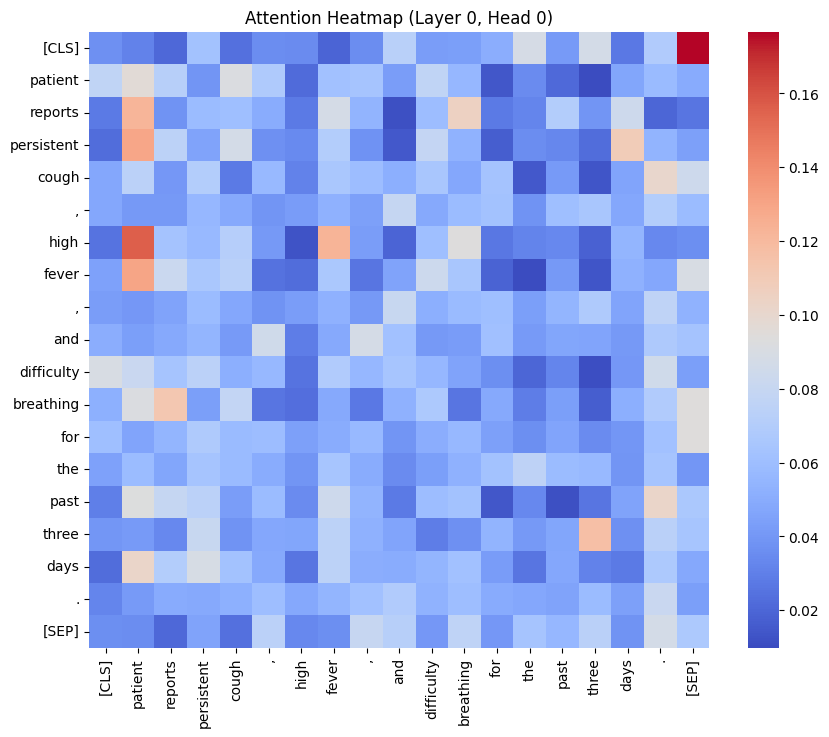

In [5]:
text1 = "Patient reports persistent cough, high fever, and difficulty breathing for the past three days."
attentions1, input_ids1 = get_attention_scores(text1, model, tokenizer)
plot_attention_heatmap(attentions1, input_ids1, tokenizer)

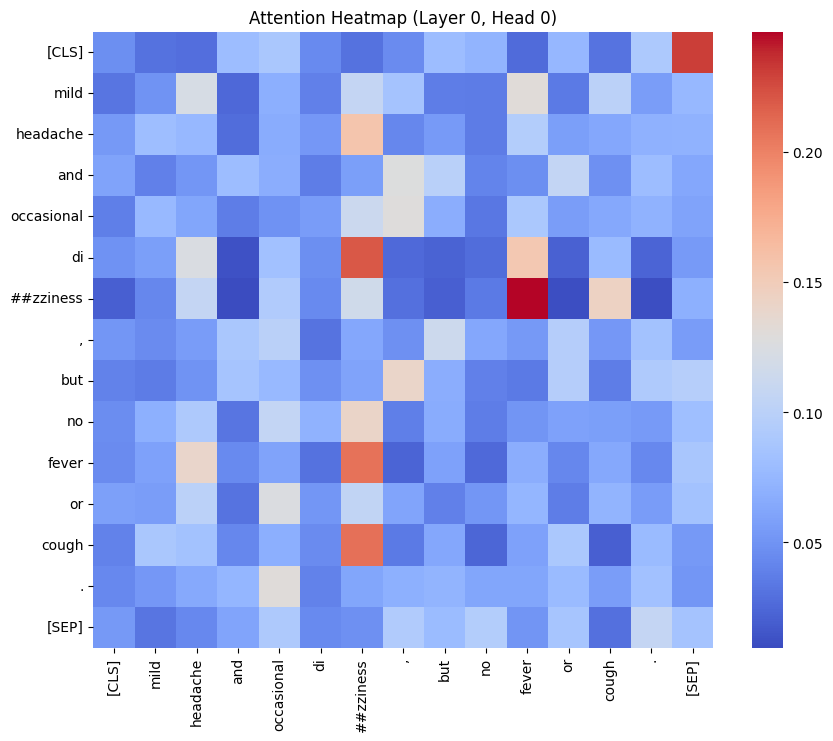

In [6]:
text2 = "Mild headache and occasional dizziness, but no fever or cough."
attentions2, input_ids2 = get_attention_scores(text2, model, tokenizer)
plot_attention_heatmap(attentions2, input_ids2, tokenizer)

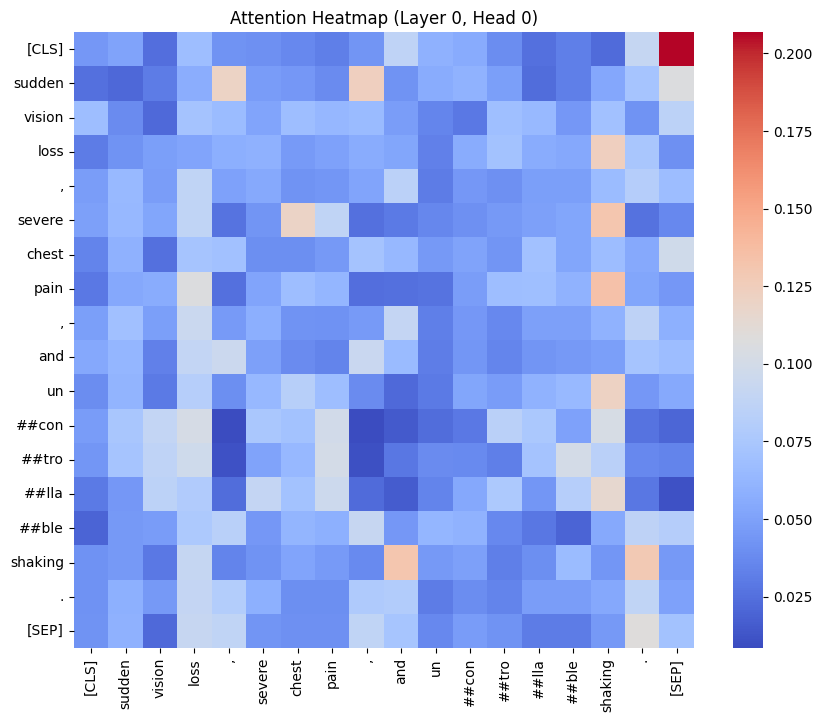

In [7]:
text3 = "Sudden vision loss, severe chest pain, and uncontrollable shaking."
attentions3, input_ids3 = get_attention_scores(text3, model, tokenizer)
plot_attention_heatmap(attentions3, input_ids3, tokenizer)